#### Importamos las librerías necesarias para el análisis

In [5]:
import pandas as pd
import numpy as np
import io
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Smarket_filepath = "/content/drive/MyDrive/Smarket.xlsx"
Smarket = pd.read_excel(Smarket_filepath)
Smarket = pd.DataFrame(Smarket)
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
X = Smarket.drop(columns = ["Direction", "Year", "Today"])
y = Smarket["Direction"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)

(1000, 6)
(1000,)


In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, Y_train)
resultado = modelo.score(X_test, Y_test)
print(resultado) ## Accuracy (precisión, en %).

0.492


In [12]:
# Validación cruzada k fold
from sklearn.model_selection import KFold

modelo_cross=DecisionTreeClassifier()
kfold_validacion=KFold(10)

In [13]:
resultados=cross_val_score(modelo_cross,X,y,cv=kfold_validacion)
print(resultados)
resultados.mean()

[0.448 0.528 0.472 0.496 0.496 0.448 0.44  0.496 0.504 0.512]


0.484

In [15]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

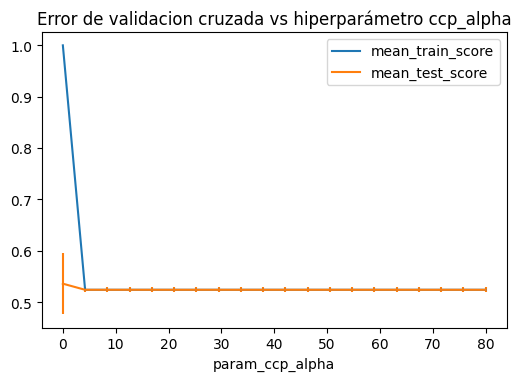

In [21]:
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 12,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, Y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");